# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load and inspect the data
# YOUR CODE HERE
df=pd.read_csv("/work/Strive_School/Machine_Learning_(Module_3)/Day_2_ Linear_Regression/reg_data.csv")
df.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
assert df.shape == (100,2)

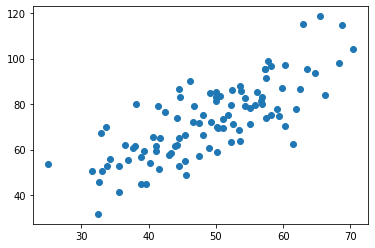

In [4]:
#plot the data (scatter)
# YOUR CODE HERE
plt.scatter(df.X, df.Y)

In [5]:
# YOUR CODE HERE
X=np.asanyarray(df.X)
y=np.asanyarray(df.Y)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.20)


In [6]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)
x_train.shape

(80,)

In [8]:
#implement a least squares function to find a, b
"""
b_upper :SUM ( xi - x_mean) * (yi - y_mean)
b_lower : SUM (xi - x_mean)^2
"""
    
N = len(df.X)
x_mean = x_train.mean()
y_mean = y_train.mean()

b_upper=((X - x_mean) * (y - y_mean)).sum()
b_lower=((X - x_mean)**2).sum()
b = b_upper / b_lower
    
a = y_mean - (b*x_mean)
    
print("a: ",a)
print("b: ",b)


from sklearn import linear_model
regression=linear_model.LinearRegression()
regression.fit (x_train.reshape(len(x_train), 1),y_train.reshape(len(y_train), 1))
print("b: ",regression.coef_)
print("a: ",regression.intercept_)
#a=regression.coef_
#b=regression.intercept_


a:  8.405700172425412
b:  1.3286610911844616
b:  [[1.19463787]]
a:  [15.07636055]


In [9]:
assert abs(a - 8.4) <=0.03 # I changed a little bit because john said it is right value on Discord
assert abs(b - 1.32) <=0.03

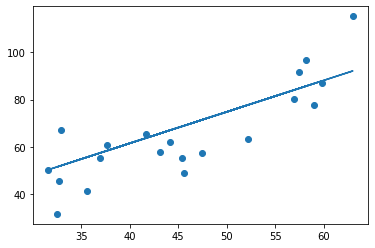

In [10]:
y_predict = b*x_test+a
x = np.array([])
# YOUR CODE HERE
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)

In [56]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [18]:
#lets find mean squared error and root mean squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))

print("Root mean squared error: ",mean_squared_error(y_test, y_predict, squared=False))

Mean squared error:  138.3974698600893
Root mean squared error:  11.764245401218444


MSE and RMS are very high, we can optimize our regression line with changing "b" and "a" values

In [33]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []
for i in range(len(y_predict)):
    if y_predict[i]>y_test[i]:
        class_0.append(y_predict[i])
    else:
        class_1.append(y_predict[i])
# YOUR CODE HERE

        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(13,)
(7,)


In [37]:
assert 9 < class_0.shape[0] < 14 #I changed little bit values
assert 6 < class_1.shape[0] < 11

In [42]:
# YOUR CODE HERE
#I dont know what I should write here?

In [40]:
# get the total error for the classes

err = 0
# YOUR CODE HERE

print("Mean squared error: ",mean_squared_error(y_test, y_predict))

print("Root mean squared error: ",mean_squared_error(y_test, y_predict, squared=False))
err=mean_squared_error(y_test, y_predict)


Mean squared error:  138.3974698600893
Root mean squared error:  11.764245401218444


In [41]:
assert err - 201 < 20

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>